## Semana 2

### Bibliotecas e dados brutos

In [1]:
# bibliotecas usadas:
import pandas as pd # manipulação dos dados
import seaborn as sns # gráficos

# opcional (ocutar alguns alertas)
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados_brutos = pd.read_csv('tabela_aluracash.csv', sep=';')
dados_brutos.sample(5) #amostra dos dados brutos

,PESSOA,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,EMPRESTIMO,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,SOLICITACAO,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
13939,g8rKRpwK-qOqO,24.0,24000.0,Alugada,1.0,vHjhZL4u-RCcQ,Médico,A,8500.0,7.90,1.0,0.35,fZR1OM2p-f3kL,0.0,2
14803,nw6IU3Fp-vfE8,44.0,57000.0,Alugada,1.0,DRsxbjrw-Fyrm,Pessoal,B,4200.0,NaN,0.0,0.07,PqwjTDpq-Kwq1,0.0,11
32427,E2OcAuzp-dA2o,22.0,68400.0,Hipotecada,0.0,A9FCFMHc-HQkc,Pagamento de débitos,D,10000.0,15.95,1.0,0.15,6ZTILaFz-4DGN,0.0,4
23853,xCZi9IxK-znX2,25.0,96000.0,Alugada,1.0,ityZqmeM-HpTr,Melhora do lar,B,12000.0,9.99,0.0,0.13,pEHbFzoM-bLuO,0.0,4
4981,zO1ztO1I-EP8l,21.0,72000.0,Hipotecada,5.0,b9cokrx6-8iHg,Pagamento de débitos,A,2000.0,6.54,0.0,0.03,cSbLAFwA-pKK1,0.0,2


### Informações do dataset

#### Nº de linhas e colunas

In [3]:
dados_brutos.shape

(34485, 15)

#### Colunas + tipos das colunas

In [4]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PESSOA                       34485 non-null  object 
 1   IDADE                        34165 non-null  float64
 2   RENDIMENTO_ANUAL             34150 non-null  float64
 3   SITUACAO_PROPRIEDADE         34154 non-null  object 
 4   ANOS_TRABALHADOS             33231 non-null  float64
 5   EMPRESTIMO                   34485 non-null  object 
 6   MOTIVO_EMPRESTIMO            34174 non-null  object 
 7   PONTUACAO                    34176 non-null  object 
 8   VALOR_EMPRESTIMO             34154 non-null  float64
 9   JUROS                        30859 non-null  float64
 10  POSSIB_INADIMPLENCIA         34142 non-null  float64
 11  EMPRESTIMO_PERC_RENDA_ANUAL  34170 non-null  float64
 12  SOLICITACAO                  34485 non-null  object 
 13  INADIMPLENTE    

#### Dados nulos por colunas

In [5]:
dados_brutos.isnull().sum()

PESSOA                            0
IDADE                           320
RENDIMENTO_ANUAL                335
SITUACAO_PROPRIEDADE            331
ANOS_TRABALHADOS               1254
EMPRESTIMO                        0
MOTIVO_EMPRESTIMO               311
PONTUACAO                       309
VALOR_EMPRESTIMO                331
JUROS                          3626
POSSIB_INADIMPLENCIA            343
EMPRESTIMO_PERC_RENDA_ANUAL     315
SOLICITACAO                       0
INADIMPLENTE                    366
ANOS_PRIMEIRO_CREDITO             0
dtype: int64

#### Dados vazios (tipo string) por colunas

In [6]:
(dados_brutos == '').sum()

PESSOA                         0
IDADE                          0
RENDIMENTO_ANUAL               0
SITUACAO_PROPRIEDADE           0
ANOS_TRABALHADOS               0
EMPRESTIMO                     0
MOTIVO_EMPRESTIMO              0
PONTUACAO                      0
VALOR_EMPRESTIMO               0
JUROS                          0
POSSIB_INADIMPLENCIA           0
EMPRESTIMO_PERC_RENDA_ANUAL    0
SOLICITACAO                    0
INADIMPLENTE                   0
ANOS_PRIMEIRO_CREDITO          0
dtype: int64

#### Criando um subset com as colunes necessárias

In [7]:
dados = dados_brutos[[ 'IDADE', 'RENDIMENTO_ANUAL', 'SITUACAO_PROPRIEDADE',
       'ANOS_TRABALHADOS', 'MOTIVO_EMPRESTIMO', 'PONTUACAO',
       'VALOR_EMPRESTIMO', 'JUROS', 'POSSIB_INADIMPLENCIA',
       'EMPRESTIMO_PERC_RENDA_ANUAL', 'INADIMPLENTE',
       'ANOS_PRIMEIRO_CREDITO']]
dados.sample(5)

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
16787,25.0,80000.0,Hipotecada,2.0,Médico,A,15000.0,NaN,0.0,NaN,0.0,3
2067,24.0,85000.0,Hipotecada,0.0,Pessoal,B,10000.0,10.00,0.0,0.12,0.0,4
25983,26.0,70000.0,Hipotecada,6.0,Melhora do lar,B,12000.0,11.26,0.0,0.17,0.0,4
1229,38.0,32000.0,Alugada,0.0,Pagamento de débitos,B,NaN,6.54,NaN,0.13,0.0,2
2999,27.0,48000.0,Alugada,5.0,Médico,B,9000.0,10.99,0.0,0.19,0.0,10


### Remoção de dados nulos

Será removida linhas com 2 ou mais dados nulos.

In [8]:
for j in dados.columns:
    for i in dados.columns:
        if i == j:
            pass
        else:
            dados_nulos = dados[dados[[i, j]].isnull().all(1)]
            dados = dados.drop(dados_nulos.index)
            
print(dados.shape)

(32669, 12)


Menos de 2 mil linhas foram eliminadas.

In [9]:
dados.isnull().sum()

IDADE                            16
RENDIMENTO_ANUAL                 12
SITUACAO_PROPRIEDADE             20
ANOS_TRABALHADOS                839
MOTIVO_EMPRESTIMO                11
PONTUACAO                        15
VALOR_EMPRESTIMO                  9
JUROS                          3065
POSSIB_INADIMPLENCIA             11
EMPRESTIMO_PERC_RENDA_ANUAL      11
INADIMPLENTE                     22
ANOS_PRIMEIRO_CREDITO             0
dtype: int64

Principal problema está nas colunas **ANOS_TRABALHADOS** e **JUROS**.

Os dados nulos foram preenchidos utilizando o método 'ffill'.

In [10]:
dados = dados.fillna(method="ffill")
dados.isnull().sum()

IDADE                          0
RENDIMENTO_ANUAL               0
SITUACAO_PROPRIEDADE           0
ANOS_TRABALHADOS               0
MOTIVO_EMPRESTIMO              0
PONTUACAO                      0
VALOR_EMPRESTIMO               0
JUROS                          0
POSSIB_INADIMPLENCIA           0
EMPRESTIMO_PERC_RENDA_ANUAL    0
INADIMPLENTE                   0
ANOS_PRIMEIRO_CREDITO          0
dtype: int64

### Tratamento de outliers

A variáveis categórias não serão tratadas aqui.

#### IDADE

In [11]:
dados['IDADE'].sort_values().unique()

array([ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
        31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
        53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  69.,  70.,  73.,  76.,  78.,  80.,  84.,
        94., 123., 144.])

Foi detectada idades superior a 120 anos.

In [12]:
dados[dados['IDADE'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
12360,144.0,6000000.0,Hipotecada,12.0,Pessoal,C,5000.0,12.73,0.0,0.00,0.0,25
18648,123.0,80004.0,Alugada,2.0,Educativo,B,20400.0,10.25,0.0,0.25,0.0,3
19597,144.0,200000.0,Hipotecada,4.0,Educativo,B,6000.0,11.86,0.0,0.03,0.0,2
23469,123.0,78000.0,Alugada,7.0,Empreendimento,B,20000.0,9.70,0.0,0.26,0.0,4
32584,144.0,250000.0,Alugada,4.0,Empreendimento,C,4800.0,13.57,0.0,0.02,0.0,3


O peso de 5 linhas num dataset de mais de 34 mil linhas é extremamente pequeno, essas linhas foram excuídas.

In [13]:
dados = dados.drop(dados[dados['IDADE'] > 120].index)
dados[dados['IDADE'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO


#### RENDIMENTO_ANUAL

In [14]:
dados['RENDIMENTO_ANUAL'].sort_values().unique()

array([   4000.,    4080.,    4200., ..., 1782000., 1900000., 2039784.])

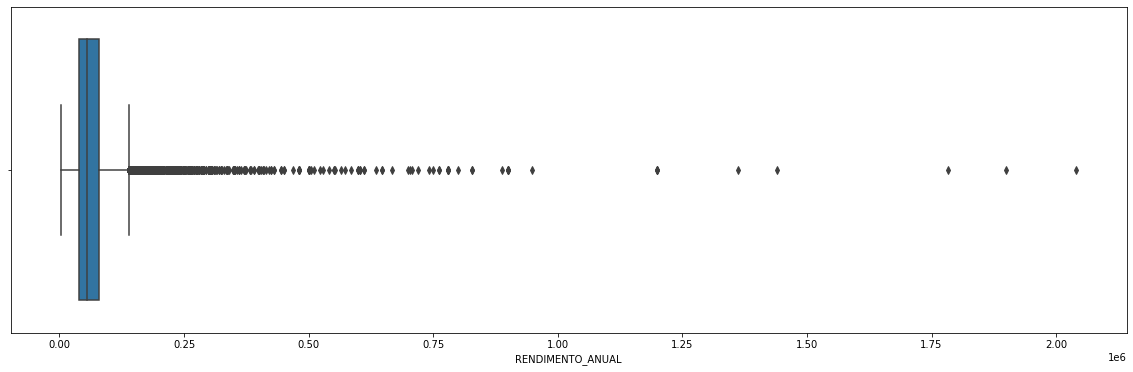

In [15]:
ax = sns.boxplot(x=dados['RENDIMENTO_ANUAL'])
ax.figure.set_size_inches(20, 6)

In [16]:
dados[dados['RENDIMENTO_ANUAL'] > 1000000]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
6584,40.0,1200000.0,Hipotecada,1.0,Médico,A,10000.0,14.65,0.0,0.01,0.0,16
9073,42.0,2039784.0,Alugada,0.0,Empreendimento,C,8450.0,12.29,0.0,0.00,1.0,15
12606,47.0,1362000.0,Hipotecada,9.0,Empreendimento,A,6600.0,7.74,0.0,0.00,0.0,17
15434,36.0,1200000.0,Própria,16.0,Médico,A,10000.0,6.54,0.0,0.01,0.0,11
19815,63.0,1782000.0,Alugada,13.0,Educativo,C,12025.0,14.27,0.0,0.01,0.0,30
28515,32.0,1200000.0,Hipotecada,1.0,Empreendimento,A,12000.0,7.51,0.0,0.01,0.0,8
28779,60.0,1900000.0,Hipotecada,5.0,Pessoal,A,1500.0,14.38,0.0,0.00,0.0,21
29934,44.0,1440000.0,Hipotecada,7.0,Pagamento de débitos,A,6400.0,7.40,0.0,0.00,0.0,15


Há pessoas com rendimento anual superior a 1 milhão.

#### ANOS_TRABALHADOS

In [17]:
dados['ANOS_TRABALHADOS'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  34.,
        38.,  41., 123.])

Há dois cidadãos que trabalharam por "123 anos", definitivamente são um outliers. 

In [18]:
dados[dados['ANOS_TRABALHADOS'] > 100]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
25055,22.0,59000.0,Alugada,123.0,Pessoal,D,35000.0,16.02,1.0,0.59,1.0,3
31592,21.0,192000.0,Hipotecada,123.0,Empreendimento,A,20000.0,6.54,0.0,0.10,0.0,4


In [19]:
dados = dados.drop(dados[dados['ANOS_TRABALHADOS'] > 120].index)
dados[dados['ANOS_TRABALHADOS'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO


#### VALOR_EMPRESTIMO

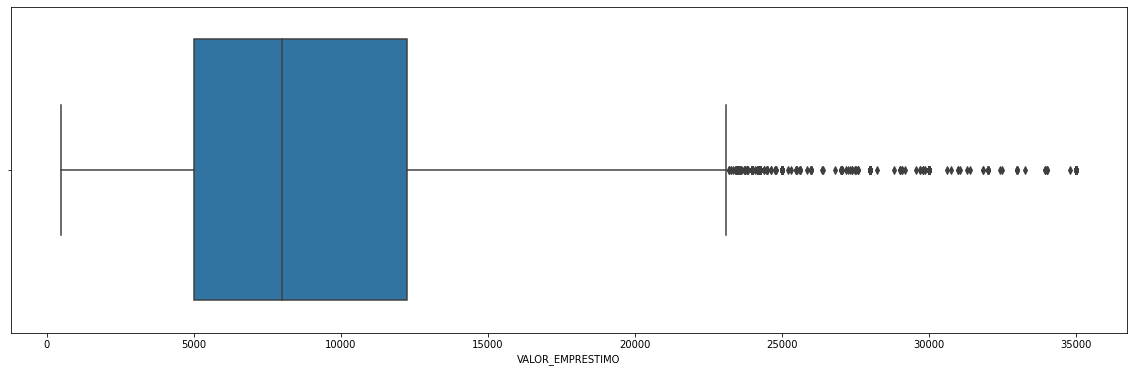

In [20]:
ax = sns.boxplot(x=dados['VALOR_EMPRESTIMO'])
ax.figure.set_size_inches(20, 6)

Não vejo nenhum problema em pegar empréstimos com valores elevados.

#### JUROS

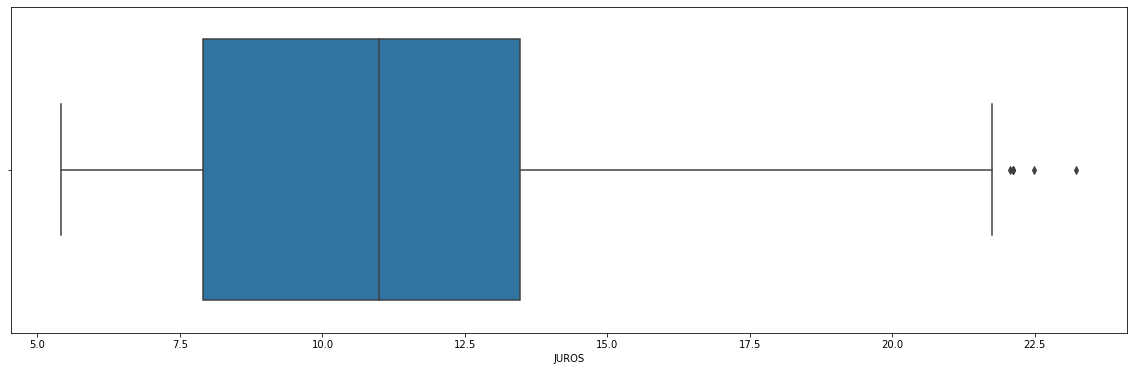

In [21]:
ax = sns.boxplot(x=dados['JUROS'])
ax.figure.set_size_inches(20, 6)

Nada anormal com os juros.

#### EMPRESTIMO_PERC_RENDA_ANUAL

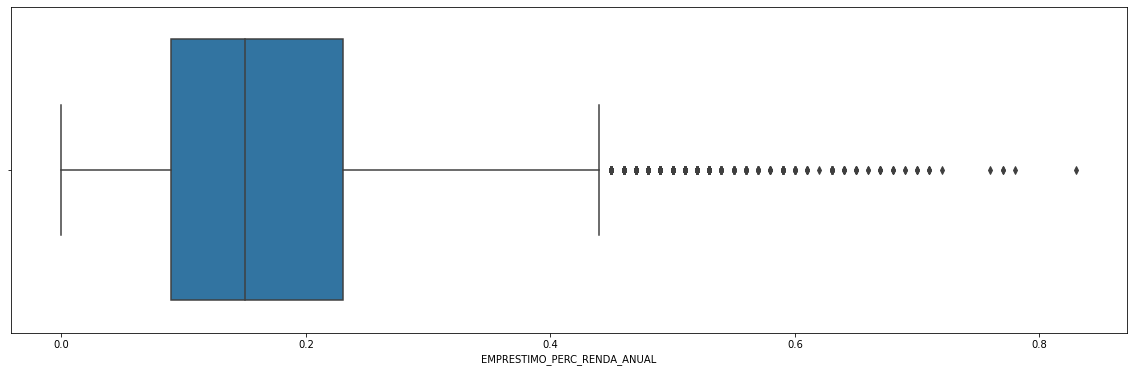

In [22]:
ax = sns.boxplot(x=dados['EMPRESTIMO_PERC_RENDA_ANUAL'])
ax.figure.set_size_inches(20, 6)

Nada anormal aqui.

#### ANOS_PRIMEIRO_CREDITO

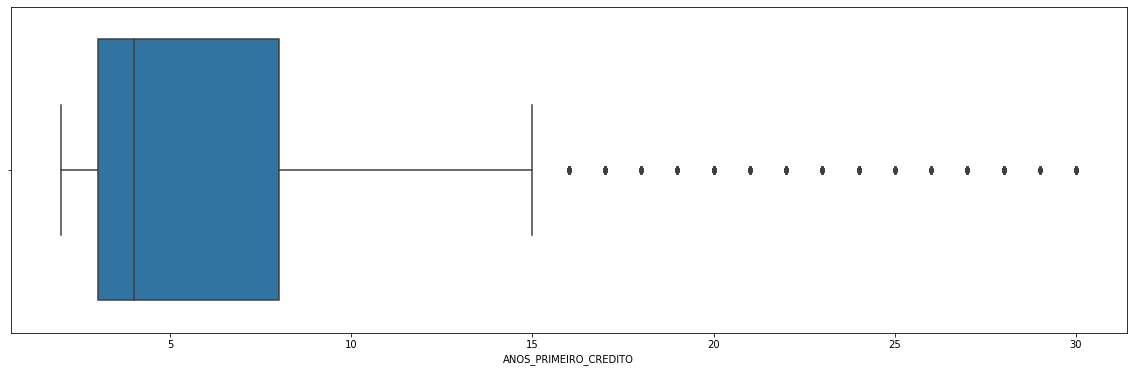

In [23]:
ax = sns.boxplot(x=dados['ANOS_PRIMEIRO_CREDITO'])
ax.figure.set_size_inches(20, 6)

Nada anormal aqui.

#### Resultado final

In [24]:
dados.shape

(32662, 12)

O resultado final é uma tabela com 32662 linhas.

In [25]:
dados_brutos.shape[0]- dados.shape[0]

1823

1823 linhas foram eliminadas.

### Analisar a correlação das variáveis

In [26]:
dados.corr()

,IDADE,RENDIMENTO_ANUAL,ANOS_TRABALHADOS,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
IDADE,1.000000,0.140374,0.168456,0.051828,0.013102,-0.020246,-0.041165,0.006565,0.874492
RENDIMENTO_ANUAL,0.140374,1.000000,0.152353,0.315828,0.001791,-0.167734,-0.293480,-0.002939,0.122788
ANOS_TRABALHADOS,0.168456,0.152353,1.000000,0.108270,-0.052594,-0.084903,-0.058264,-0.029011,0.145305
VALOR_EMPRESTIMO,0.051828,0.315828,0.108270,1.000000,0.133003,0.105551,0.572496,0.038997,0.041864
JUROS,0.013102,0.001791,-0.052594,0.133003,1.000000,0.304524,0.109035,0.455584,0.015850
POSSIB_INADIMPLENCIA,-0.020246,-0.167734,-0.084903,0.105551,0.304524,1.000000,0.379165,0.178919,-0.015775
EMPRESTIMO_PERC_RENDA_ANUAL,-0.041165,-0.293480,-0.058264,0.572496,0.109035,0.379165,1.000000,0.036062,-0.031845
INADIMPLENTE,0.006565,-0.002939,-0.029011,0.038997,0.455584,0.178919,0.036062,1.000000,0.004525
ANOS_PRIMEIRO_CREDITO,0.874492,0.122788,0.145305,0.041864,0.015850,-0.015775,-0.031845,0.004525,1.000000


A coluna **EMPRESTIMO_PERC_RENDA_ANUAL** tem uma correlação alta com **VALOR_EMPRESTIMO** e estão diretamente relacionadas. Uma delas será removida para não haver duplicidade na base de dados.

In [27]:
dados = dados.drop('EMPRESTIMO_PERC_RENDA_ANUAL', axis = 1)

In [28]:
dados.columns

Index(['IDADE', 'RENDIMENTO_ANUAL', 'SITUACAO_PROPRIEDADE', 'ANOS_TRABALHADOS',
       'MOTIVO_EMPRESTIMO', 'PONTUACAO', 'VALOR_EMPRESTIMO', 'JUROS',
       'POSSIB_INADIMPLENCIA', 'INADIMPLENTE', 'ANOS_PRIMEIRO_CREDITO'],
      dtype='object')

In [29]:
#sns.pairplot(dados, hue='INADIMPLENTE', markers=["o", "s"], palette='Dark2')

A coluna **INADIPLENTE** é o nosso alvo. Essa coluna será separada.

In [30]:
x = dados.drop(['INADIMPLENTE'], axis = 1)
alvo = dados['INADIMPLENTE']

Para variáveis categóricas será utilizada um outra abordagem.
Faremos a criação dessas novas colunas com o **OneHotEncoder**.

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
colunas_categoricas = ['SITUACAO_PROPRIEDADE','MOTIVO_EMPRESTIMO','PONTUACAO']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(), colunas_categoricas),
    remainder='passthrough')

dados2 = one_hot_enc.fit_transform(x)
dados2 = pd.DataFrame(dados2, columns=one_hot_enc.get_feature_names_out())
dados2.head()

,onehotencoder__SITUACAO_PROPRIEDADE_Alugada,onehotencoder__SITUACAO_PROPRIEDADE_Hipotecada,onehotencoder__SITUACAO_PROPRIEDADE_Outros,onehotencoder__SITUACAO_PROPRIEDADE_Própria,onehotencoder__MOTIVO_EMPRESTIMO_Educativo,onehotencoder__MOTIVO_EMPRESTIMO_Empreendimento,onehotencoder__MOTIVO_EMPRESTIMO_Melhora do lar,onehotencoder__MOTIVO_EMPRESTIMO_Médico,onehotencoder__MOTIVO_EMPRESTIMO_Pagamento de débitos,onehotencoder__MOTIVO_EMPRESTIMO_Pessoal,...,onehotencoder__PONTUACAO_E,onehotencoder__PONTUACAO_F,onehotencoder__PONTUACAO_G,remainder__IDADE,remainder__RENDIMENTO_ANUAL,remainder__ANOS_TRABALHADOS,remainder__VALOR_EMPRESTIMO,remainder__JUROS,remainder__POSSIB_INADIMPLENCIA,remainder__ANOS_PRIMEIRO_CREDITO
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,25.0,58020.0,9.0,2000.0,6.91,0.0,4.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,28.0,61000.0,9.0,25000.0,9.91,1.0,7.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,45000.0,3.0,5000.0,12.42,0.0,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,29.0,35000.0,12.0,1800.0,5.42,0.0,7.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,26.0,87000.0,9.0,25000.0,12.73,0.0,2.0


### Normalização

Os dados tem escalas diferentes, serão colocados numa mesma escala.

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
scaler.fit(dados2)
MinMaxScaler()

MinMaxScaler()

In [35]:
dados2 = scaler.transform(dados2)
dados2 = pd.DataFrame(dados2, columns = one_hot_enc.get_feature_names_out())
dados2

,onehotencoder__SITUACAO_PROPRIEDADE_Alugada,onehotencoder__SITUACAO_PROPRIEDADE_Hipotecada,onehotencoder__SITUACAO_PROPRIEDADE_Outros,onehotencoder__SITUACAO_PROPRIEDADE_Própria,onehotencoder__MOTIVO_EMPRESTIMO_Educativo,onehotencoder__MOTIVO_EMPRESTIMO_Empreendimento,onehotencoder__MOTIVO_EMPRESTIMO_Melhora do lar,onehotencoder__MOTIVO_EMPRESTIMO_Médico,onehotencoder__MOTIVO_EMPRESTIMO_Pagamento de débitos,onehotencoder__MOTIVO_EMPRESTIMO_Pessoal,...,onehotencoder__PONTUACAO_E,onehotencoder__PONTUACAO_F,onehotencoder__PONTUACAO_G,remainder__IDADE,remainder__RENDIMENTO_ANUAL,remainder__ANOS_TRABALHADOS,remainder__VALOR_EMPRESTIMO,remainder__JUROS,remainder__POSSIB_INADIMPLENCIA,remainder__ANOS_PRIMEIRO_CREDITO
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.067568,0.026535,0.219512,0.043478,0.083708,0.0,0.071429
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.108108,0.027999,0.219512,0.710145,0.252247,1.0,0.178571
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.027027,0.020140,0.073171,0.130435,0.393258,0.0,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.121622,0.015228,0.292683,0.037681,0.000000,0.0,0.178571
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.081081,0.040771,0.219512,0.710145,0.410674,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32657,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.135135,0.025052,0.341463,0.443478,0.522472,0.0,0.250000
32658,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.148649,0.031439,0.365854,0.159420,0.310674,0.0,0.250000
32659,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.121622,0.044700,0.000000,0.159420,0.341011,0.0,0.178571
32660,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.175676,0.042244,0.121951,0.107246,0.197753,0.0,0.142857


### Separação dos dados de teste e treino

In [36]:
SEED = 144
from sklearn.model_selection import train_test_split
x_treino, x_teste, alvo_treino, alvo_teste = train_test_split(dados2, alvo, random_state = SEED, stratify = alvo)
alvo_treino

11213    0.0
20021    0.0
21686    0.0
32595    0.0
24395    0.0
        ... 
26596    0.0
3716     0.0
16592    0.0
10360    0.0
30046    1.0
Name: INADIMPLENTE, Length: 24496, dtype: float64

Modelo

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

Métricas

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.colors

### Balanceamento na variável alvo

O Oversampling consiste em criar sinteticamente novas observações da classe minoritária, com o objetivo de igualar a proporção das categorias.

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = SEED)
X_balanceado_over, alvo_balanceado_over = smote.fit_resample(x_treino, alvo_treino)
X_balanceado_over

,onehotencoder__SITUACAO_PROPRIEDADE_Alugada,onehotencoder__SITUACAO_PROPRIEDADE_Hipotecada,onehotencoder__SITUACAO_PROPRIEDADE_Outros,onehotencoder__SITUACAO_PROPRIEDADE_Própria,onehotencoder__MOTIVO_EMPRESTIMO_Educativo,onehotencoder__MOTIVO_EMPRESTIMO_Empreendimento,onehotencoder__MOTIVO_EMPRESTIMO_Melhora do lar,onehotencoder__MOTIVO_EMPRESTIMO_Médico,onehotencoder__MOTIVO_EMPRESTIMO_Pagamento de débitos,onehotencoder__MOTIVO_EMPRESTIMO_Pessoal,...,onehotencoder__PONTUACAO_E,onehotencoder__PONTUACAO_F,onehotencoder__PONTUACAO_G,remainder__IDADE,remainder__RENDIMENTO_ANUAL,remainder__ANOS_TRABALHADOS,remainder__VALOR_EMPRESTIMO,remainder__JUROS,remainder__POSSIB_INADIMPLENCIA,remainder__ANOS_PRIMEIRO_CREDITO
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.445946,0.039788,0.048780,0.217391,0.130337,0.0,0.857143
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.040541,0.040402,0.121951,0.565217,0.083708,0.0,0.000000
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.027027,0.017684,0.048780,0.275362,0.096629,0.0,0.071429
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.027027,0.034876,0.146341,0.304348,0.000000,0.0,0.000000
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.040541,0.024071,0.170732,0.275362,0.020787,0.0,0.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.084980,0.014775,0.114914,0.172538,0.489572,0.0,0.081733
40334,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.037277,0.015895,0.014297,0.396300,0.424119,1.0,0.020935
40335,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.066644,0.036354,0.018845,0.420290,0.636326,0.0,0.063309
40336,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.135135,0.046081,0.360165,0.386673,0.488019,0.0,0.178571


### Modelos

#### Árvore de Decisão

In [41]:
arvore = DecisionTreeClassifier(random_state=SEED)
arvore.fit(X_balanceado_over, alvo_balanceado_over)
previsao_arvore = arvore.predict(x_teste)

In [42]:
print(classification_report(alvo_teste, previsao_arvore))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      6723
         1.0       0.51      0.54      0.52      1443

    accuracy                           0.83      8166
   macro avg       0.71      0.71      0.71      8166
weighted avg       0.83      0.83      0.83      8166



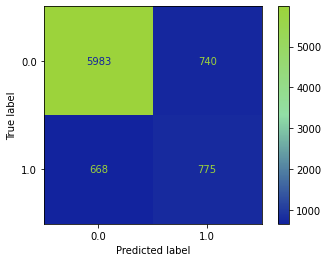

In [43]:
mapa_calor = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#12239e","#92dfa6","#9cd33b"])
ConfusionMatrixDisplay.from_estimator(arvore, x_teste, alvo_teste, cmap = mapa_calor)
plt.grid(False)
plt.show()

## Notebook WIP...